In [11]:
%pylab notebook --no-import-all
%matplotlib notebook
from astropy import units as u
from astropy import constants as const
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import psalib as pl

Populating the interactive namespace from numpy and matplotlib


In [2]:
PI     = np.pi
TWO_PI = 2*PI 

g      = const.g0

In [3]:
# Raw data
len0     = [90.0 * u.cm, 0.1 * u.cm]
m_string = [6.3 * u.g, 0.1 * u.g]

L    = [56.0 * u.cm, np.sqrt((0.5 * u.cm)**2 + (0.1 * u.cm)**2)]

len_100 = [len0[0] + (1.0 * u.cm), np.sqrt(2*(L[1]**2))]
len_200 = [len0[0] + (4.0 * u.cm), np.sqrt(2*(L[1]**2))]
len_400 = [len0[0] + (32.0 * u.cm), np.sqrt(2*(L[1]**2))]

# Resting overhang was 34.0 cm

oh_100  = [35.0 * u.cm, 0.5 * u.cm]
oh_200  = [38.0 * u.cm, 0.5 * u.cm]
oh_400  = [66.0 * u.cm, 0.5 * u.cm]

m_100   = [100. * u.g, 1. * u.g]
m_200   = [200. * u.g, 1. * u.g]
m_400   = [400. * u.g, 1. * u.g]

In [79]:
# funcs
def rho(m, l):
    rho   = m[0].to(u.kg) / l[0].to(u.m)
    srho2 = ((1/l[0].to(u.m))*m[1].to(u.kg))**2 + ((-m[0].to(u.kg) / ((l[0].to(u.m))**2))*l[1].to(u.m))**2
    
    return [rho, np.sqrt(srho2)]

def tension(m, oh, p):
    l   = oh[0].to(u.m)
    sl  = oh[1].to(u.m)
    
    T   = (m[0].to(u.kg))*g + p[0]*l*g
    sT2 = (g*(m[1].to(u.kg)))**2 + (l*g*p[1])**2 + (p[0]*g*sl)**2
    return [T, np.sqrt(sT2)]

def lamda(n): 
    assert n >= 1 and n % 1 == 0, 'n must be a positive integer'
    
    return [(2*L[0].to(u.m)) / n, (2*L[1].to(u.m)) / n]

def freq(lam, T, p):
    nu   = (1/lam[0])*(T[0] / p[0])**(1/2)
    
    a1   = (-1 / lam[0]**2) * (T[0] / p[0])**(1/2)
    a2   = (1 / (2*lam[0]*p[0])) * (T[0] / p[0])**(-1/2)
    a3   = (-1 / (2*lam[0])) * (T[0] / p[0])**(-1/2) * (T[0] / (p[0]**2))
    
    snu2 = (a1*lam[1])**2 + (a2*T[1])**2 + (a3*p[1])**2
    
    return [nu, np.sqrt(snu2)]

def damp_amp(om0, om, gamma):
    return 1 / np.sqrt((om**2 - om0**2)**2 + (gamma**2)*(om**2))

In [60]:
rho100 = rho(m_string, len_100)
rho200 = rho(m_string, len_200)
rho400 = rho(m_string, len_400)

T_100  = tension(m_100, oh_100, rho100)
T_200  = tension(m_200, oh_200, rho200)
T_400  = tension(m_400, oh_400, rho400)

rho100[0], rho200[0], rho400[0]

(<Quantity 0.006923076923076923 kg / m>,
 <Quantity 0.0067021276595744675 kg / m>,
 <Quantity 0.0051639344262295085 kg / m>)

<IPython.core.display.Javascript object>


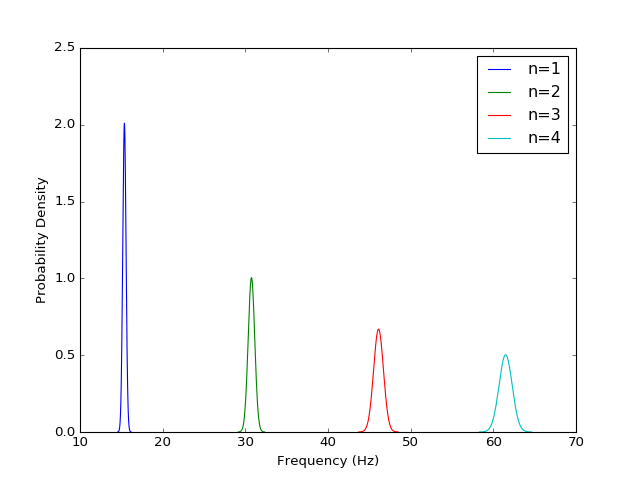

In [7]:
om_200 = [freq(lamda(1), T_200, rho200), freq(lamda(2), T_200, rho200), freq(lamda(3), T_200, rho200), freq(lamda(4), T_200, rho200)]

mu  = om_200[0][0].value
s = om_200[0][1].value

x   = np.linspace(mu - 4*s, mu + 4*s, 1000)
plt.plot(x, mlab.normpdf(x, mu, s), label='n=1')

mu  = om_200[1][0].value
s = om_200[1][1].value

x   = np.linspace(mu - 4*s, mu + 4*s, 1000)
plt.plot(x, mlab.normpdf(x, mu, s), label='n=2')

mu  = om_200[2][0].value
s = om_200[2][1].value

x   = np.linspace(mu - 4*s, mu + 4*s, 1000)
plt.plot(x, mlab.normpdf(x, mu, s), label='n=3')
mu  = om_200[3][0].value
s = om_200[3][1].value

x   = np.linspace(mu - 4*s, mu + 4*s, 1000)
plt.plot(x, mlab.normpdf(x, mu, s), label='n=4')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Probability Density')

plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


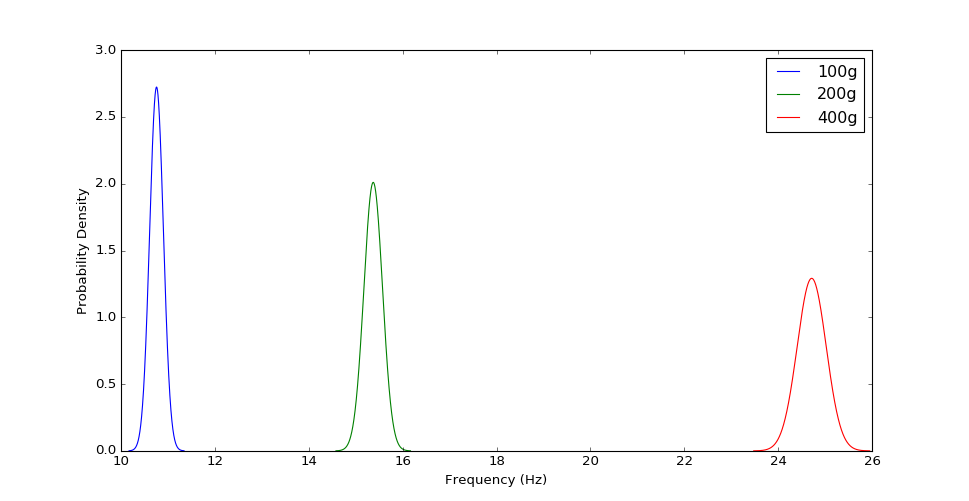

In [56]:
om1collection = [freq(lamda(1), T_100, rho100), freq(lamda(1), T_200, rho200), freq(lamda(1), T_400, rho400)]

mu  = om1collection[0][0].value
std = om1collection[0][1].value

x   = np.linspace(mu - 4*std, mu + 4*std, 1000)

plt.plot(x, mlab.normpdf(x, mu, std), label='100g')

mu  = om1collection[1][0].value
std = om1collection[1][1].value

x   = np.linspace(mu - 4*std, mu + 4*std, 1000)

plt.plot(x, mlab.normpdf(x, mu, std), label='200g')

mu  = om1collection[2][0].value
std = om1collection[2][1].value

x   = np.linspace(mu - 4*std, mu + 4*std, 1000)

plt.plot(x, mlab.normpdf(x, mu, std), label='400g')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')

In [64]:
freq(lamda(4), T_200, rho200)

[<Quantity 61.483511134611604 1 / s>, <Quantity 0.793879998119076 1 / s>]

In [42]:
baseline = [12.5 * u.cm, 0.1 * u.cm]

try1_t = np.array([0, 2, 3, 6])
try1_A = np.array([2., 1.5, .5, 0.1]) / 2.
dAp_1  = 0.1 / np.array([2., 1.5, .5, 0.1])

try2_t = np.array([0, 1, 2, 4])
try2_A = np.array([2., 1.5, .5, 0.1]) / 2.
dAp_2  = 0.1 / np.array([2., 1.5, .5, 0.1])

try3_t = np.array([0, 1, 2, 4])
try3_A = np.array([1.9, 1.5, .5, 0.1]) / 1.9
dAp_3  = 0.1 / np.array([1.9, 1.5, .5, 0.1])

trial_t = np.append(try1_t, [try2_t, try3_t])
trial_A = np.append(try1_A, [try2_A, try3_A])
dA_all  = np.append(dAp_1, [dAp_2, dAp_3])

logA    = -2*np.log(trial_A)

b, m, sy, sb, sm, r = pl.lsq(trial_t, logA) 

<IPython.core.display.Javascript object>


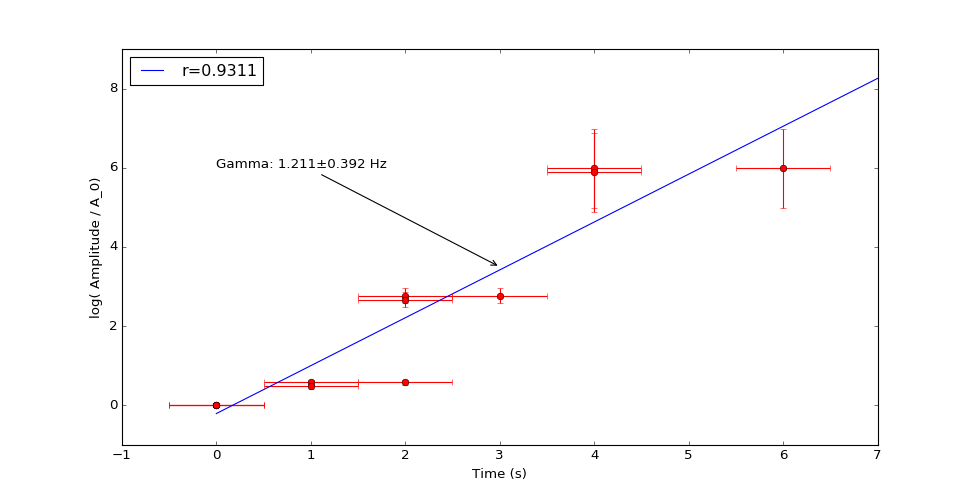

In [78]:
# -*- coding: utf-8 -*-
t = np.linspace(0, 7, 1000)

plt.plot(t, m*t + b, label=('r=%0.4f' % (r)))
plt.errorbar(trial_t, logA, xerr=0.5, yerr=dA_all, color='r', fmt='o')

plt.xlabel('Time (s)')
plt.ylabel('log( Amplitude / A_0)')
plt.legend(loc='upper left')

plt.axes().annotate(('Gamma: %2.3f±%0.3f Hz' % (m, sm)), 
                    xy=(3, 3.5), xycoords='data', 
                    xytext=(0, 6), textcoords='data',
                    arrowprops=dict(arrowstyle='->',
                                    connectionstyle='arc3'))

<IPython.core.display.Javascript object>


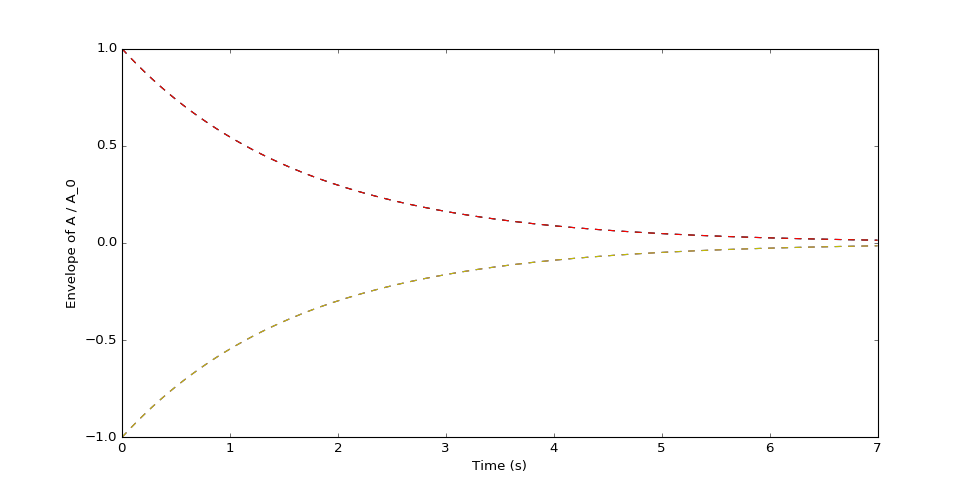

In [76]:
plt.plot(t, try1_A[0] * np.exp((-m*t)/2), ls='--')
plt.plot(t, try2_A[0] * np.exp((-m*t)/2), ls='--')
plt.plot(t, try3_A[0] * np.exp((-m*t)/2), ls='--')
plt.plot(t, -try1_A[0] * np.exp((-m*t)/2), ls='--')
plt.plot(t, -try2_A[0] * np.exp((-m*t)/2), ls='--')
plt.plot(t, -try3_A[0] * np.exp((-m*t)/2), ls='--')

plt.xlabel('Time (s)')
plt.ylabel('Envelope of A / A_0')

<IPython.core.display.Javascript object>


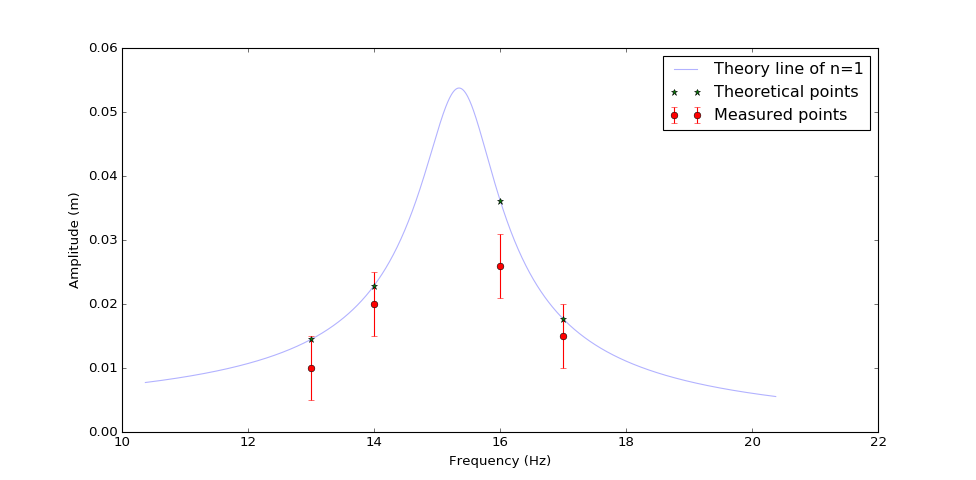

In [99]:
base   = freq(lamda(1), T_200, rho200)[0].value
vals_1 = np.array([13, 14, 16, 17])
amps_1 = np.array([1, 2, 2.6, 1.5]) / 100.
search = np.linspace(base - 5, base + 5, 1000)

plt.plot(search, damp_amp(base, search, m), label='Theory line of n=1', alpha=0.3)
plt.plot(vals_1, damp_amp(base, vals_1, m), 'g*', label='Theoretical points')
plt.errorbar(vals_1, amps_1, yerr=(0.5/100),color='r', fmt='o', label='Measured points')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (m)')
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


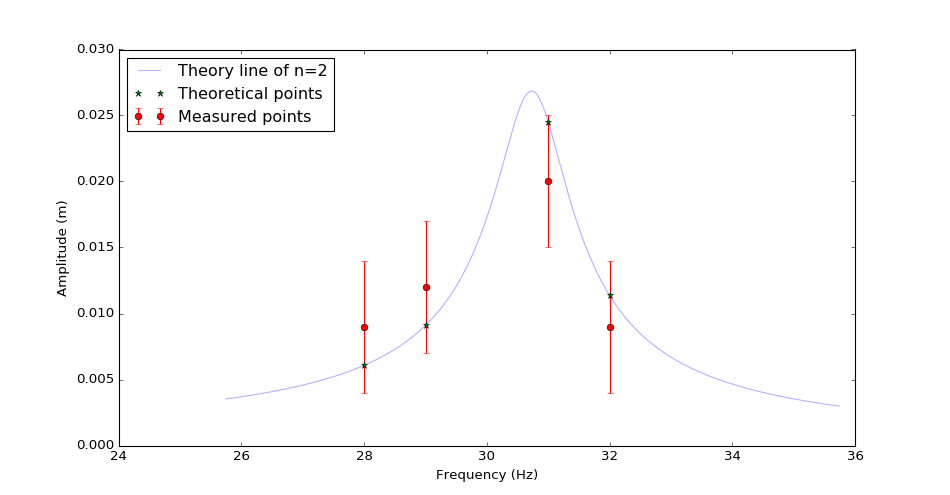

In [106]:
base   = freq(lamda(2), T_200, rho200)[0].value
vals_1 = np.array([28, 29, 31, 32])
amps_1 = np.array([0.9, 1.2, 2.0, 0.9]) / 100.
search = np.linspace(base - 5, base + 5, 1000)

plt.plot(search, damp_amp(base, search, m), label='Theory line of n=2', alpha=0.3)
plt.plot(vals_1, damp_amp(base, vals_1, m), 'g*', label='Theoretical points')
plt.errorbar(vals_1, amps_1, yerr=(0.5/100),color='r', fmt='o', label='Measured points')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (m)')
plt.legend(loc='upper left')